# importing libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importing dataset

In [8]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\marketing_campaign.csv")
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513,0,1,09/09/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635,0,1,13/11/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454,1,0,08/05/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351,1,0,06/06/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648,1,1,13/03/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# feature selection

In [9]:
features=data[["Year_Birth","Income","Kidhome","Teenhome",
              "Recency","MntWines","MntFruits","MntMeatProducts",
              "MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases",
              "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
              "NumWebVisitsMonth"]]

# scaling the features
(N.B:Dataset has been cleaned already)

In [11]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

# determining the suitable number of clusters using elbow method

In [16]:
SME=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(scaled_features)
    SME.append(kmeans.inertia_)

    
    
    


# visualising the elbow method

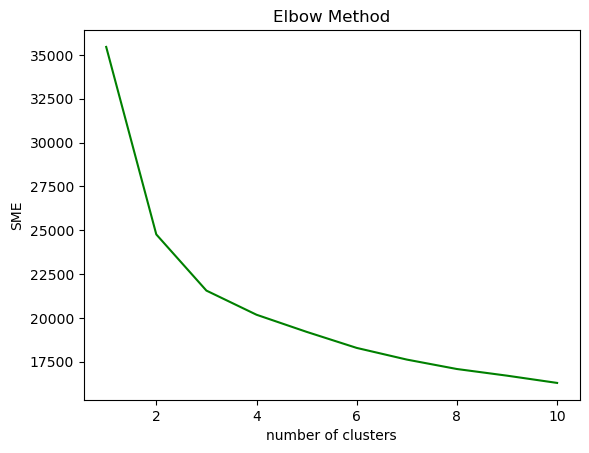

In [21]:
plt.plot(range(1,11),SME,color="green")
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("SME")
plt.show()

# Applying k-means clustering algorithm

In [25]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
clusters=kmeans.fit_predict(scaled_features)

#  Add cluster column to the dataset

In [26]:
data["cluster"]=clusters

# analyse clusters

In [27]:
cluster_analysis=data.groupby("cluster").mean()
print(cluster_analysis)

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
cluster                                                               
0        5632.562194  1971.683643  34733.335945  0.799216  0.438786   
1        5643.201709  1968.345299  76631.651282  0.042735  0.169231   
2        5461.757377  1964.483607  58176.486885  0.226230  0.939344   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
cluster                                                                       
0        49.255632   41.190989   4.954946        23.029383         7.289912   
1        49.466667  586.692308  69.560684       450.668376       100.107692   
2        48.170492  476.740984  20.742623       135.916393        28.522951   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
cluster  ...                                                                
0        ...           6.481881      0.075416      0.010774      0.000000   
1        ...     

# visualise clusters using principal components analysis(pca)

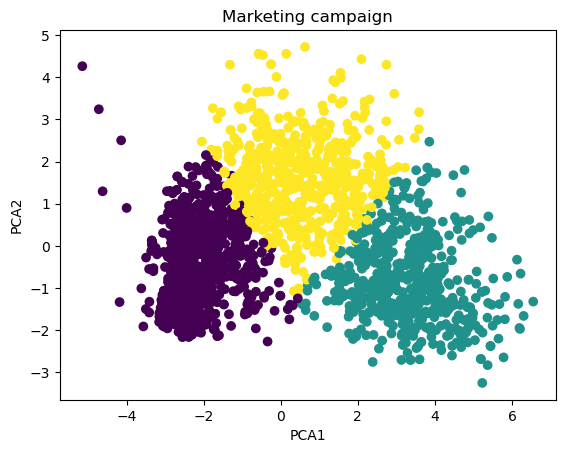

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
prinicpal_components=pca.fit_transform(scaled_features)
data["PCA1"]=prinicpal_components[:,0]
data["PCA2"]=prinicpal_components[:,1]
plt.scatter(data["PCA1"],data["PCA2"],c=data["cluster"],cmap="viridis")
plt.title("Marketing campaign")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()